In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = "/home/abidhasan/Documnet/Project/a_c_p/results/average_results_ETTh1.csv"

# Load data
df = pd.read_csv(csv_path)

# Normalize aug_type (strip spaces, lowercase)
df["aug_type"] = df["aug_type"].astype(str).str.strip().str.lower()

# Filter dataset
df = df[df["dataset"].str.strip() == "ETTh1"]

results = []
for pred_len, group in df.groupby("pred_len"):
    # Get "none" rows safely
    none_rows = group[group["aug_type"] == "none"]
    if none_rows.empty:
        continue  # skip if no "None" for this pred_len
    mse_none = none_rows["mse"].min()

    # Best augmentation (excluding None)
    others = group[group["aug_type"] != "none"]
    if others.empty:
        continue
    best_row = others.loc[others["mse"].idxmin()]

    results.append({
        "pred_len": pred_len,
        "None": mse_none,
        "Best_Aug": best_row["mse"],
        "Best_Aug_Type": best_row["aug_type"]
    })

results_df = pd.DataFrame(results).sort_values("pred_len")

# --- Plot ---
x = range(len(results_df))
bar_width = 0.4

plt.figure(figsize=(8, 6))
plt.bar([i - bar_width/2 for i in x], results_df["None"], width=bar_width, label="None")
plt.bar([i + bar_width/2 for i in x], results_df["Best_Aug"], width=bar_width, label="Best Aug")

plt.xticks(x, results_df["pred_len"])
plt.xlabel("Prediction Length")
plt.ylabel("MSE")
plt.title("ETTh1 — MSE of None vs Best Augmentation")

# Annotate augmentation name
for i, (aug, mse) in enumerate(zip(results_df["Best_Aug_Type"], results_df["Best_Aug"])):
    plt.text(i + bar_width/2, mse, aug, ha="center", va="bottom", fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


Results table:
    pred_len      Base  Best_Aug Best_Aug_Type
0        96  0.377145  0.367506     Wave-Mask
1       192  0.409866  0.406028      Wave-Mix
2       336  0.436937  0.439805      Wave-Mix
3       720  0.493941  0.475799     Freq-Mask


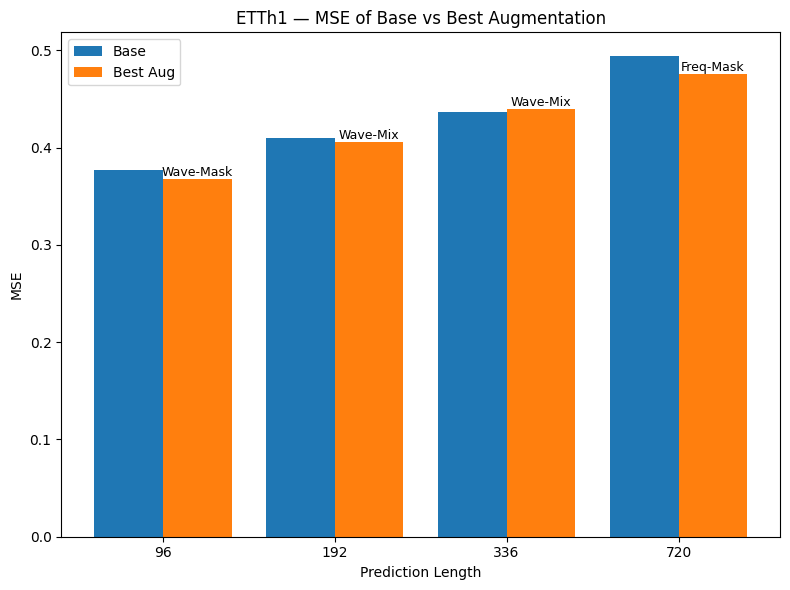

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = "/home/abidhasan/Documnet/Project/a_c_p/results/average_results_ETTh1.csv"

# Load data
df = pd.read_csv(csv_path)

# Clean strings
df["aug_type"] = df["aug_type"].astype(str).str.strip().str.strip("'")
df["dataset"] = df["dataset"].astype(str).str.strip()

# Select dataset
dataset_filter = "ETTh1"
df = df[df["dataset"] == dataset_filter]

results = []
for pred_len, group in df.groupby("pred_len"):
    # Get Base rows
    base_rows = group[group["aug_type"] == "Base"]
    if base_rows.empty:
        print(f"⚠️ No 'Base' aug_type found for pred_len={pred_len}")
        continue
    mse_base = base_rows["mse"].min()

    # Best augmentation (excluding Base)
    others = group[group["aug_type"] != "Base"]
    if others.empty:
        continue
    best_row = others.loc[others["mse"].idxmin()]

    results.append({
        "pred_len": pred_len,
        "Base": mse_base,
        "Best_Aug": best_row["mse"],
        "Best_Aug_Type": best_row["aug_type"]
    })

results_df = pd.DataFrame(results)
print("Results table:\n", results_df)

if not results_df.empty:
    results_df = results_df.sort_values("pred_len")
    x = range(len(results_df))
    bar_width = 0.4

    plt.figure(figsize=(8, 6))
    plt.bar([i - bar_width/2 for i in x], results_df["Base"], width=bar_width, label="Base")
    plt.bar([i + bar_width/2 for i in x], results_df["Best_Aug"], width=bar_width, label="Best Aug")

    plt.xticks(x, results_df["pred_len"].astype(str))
    plt.xlabel("Prediction Length")
    plt.ylabel("MSE")
    plt.title(f"{dataset_filter} — MSE of Base vs Best Augmentation")

    # Annotate best augmentation name
    for i, (aug, mse) in enumerate(zip(results_df["Best_Aug_Type"], results_df["Best_Aug"])):
        plt.text(i + bar_width/2, mse, aug, ha="center", va="bottom", fontsize=9)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [28]:
import pandas as pd

csv_path = "/home/abidhasan/Documnet/Project/a_c_p/results/average_results_ETTh1.csv"
df = pd.read_csv(csv_path)

# Look at unique values in aug_type with repr to reveal hidden characters
print("Unique aug_type values (with repr):")
print([repr(v) for v in df["aug_type"].unique()])

Unique aug_type values (with repr):
["'Base'", "'Freq-Mask'", "'Freq-Mix'", "'Wave-Mask'", "'Wave-Mix'", "'StAug'", "'Adaptive-Channel-Preserve'", "'TFMix'"]


In [29]:
import pandas as pd

csv_path = "/home/abidhasan/Documnet/Project/a_c_p/results/average_results_ETTh2.csv"
df = pd.read_csv(csv_path)

# Look at unique values in aug_type with repr to reveal hidden characters
print("Unique aug_type values (with repr):")
print([repr(v) for v in df["aug_type"].unique()])

Unique aug_type values (with repr):
["'Base'", "'Freq-Mask'", "'Freq-Mix'", "'Wave-Mask'", "'Wave-Mix'", "'StAug'", "'Adaptive-Channel-Preserve'", "'TFMix'"]


Results table:
    pred_len      Base  Best_Aug Best_Aug_Type
0        96  0.292728  0.282828     Freq-Mask
1       192  0.377185  0.364195     Freq-Mask
2       336  0.457074  0.450830      Freq-Mix
3       720  0.650311  0.669209     Freq-Mask


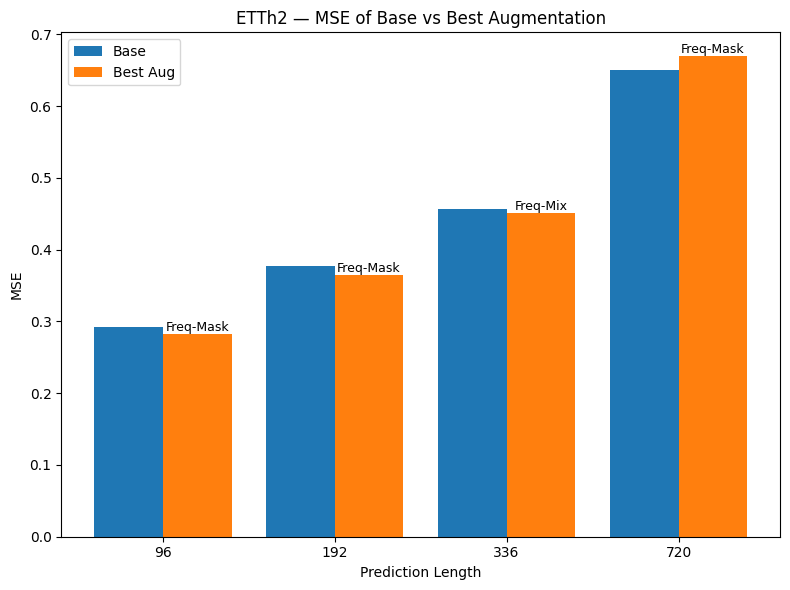

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = "/home/abidhasan/Documnet/Project/a_c_p/results/average_results_ETTh2.csv"

# Load data
df = pd.read_csv(csv_path)
# Clean strings
df["aug_type"] = df["aug_type"].astype(str).str.strip().str.strip("'")
df["dataset"] = df["dataset"].astype(str).str.strip()

# Select dataset
dataset_filter = "ETTh2"
df = df[df["dataset"] == dataset_filter]

results = []
for pred_len, group in df.groupby("pred_len"):
    # Get Base rows
    base_rows = group[group["aug_type"] == "Base"]
    if base_rows.empty:
        print(f"⚠️ No 'Base' aug_type found for pred_len={pred_len}")
        continue
    mse_base = base_rows["mse"].min()

    # Best augmentation (excluding Base)
    others = group[group["aug_type"] != "Base"]
    if others.empty:
        continue
    best_row = others.loc[others["mse"].idxmin()]

    results.append(
        {
            "pred_len": pred_len,
            "Base": mse_base,
            "Best_Aug": best_row["mse"],
            "Best_Aug_Type": best_row["aug_type"],
        }
    )

results_df = pd.DataFrame(results)
print("Results table:\n", results_df)

if not results_df.empty:
    results_df = results_df.sort_values("pred_len")
    x = range(len(results_df))
    bar_width = 0.4

    plt.figure(figsize=(8, 6))
    plt.bar(
        [i - bar_width / 2 for i in x],
        results_df["Base"],
        width=bar_width,
        label="Base",
    )
    plt.bar(
        [i + bar_width / 2 for i in x],
        results_df["Best_Aug"],
        width=bar_width,
        label="Best Aug",
    )

    plt.xticks(x, results_df["pred_len"].astype(str))
    plt.xlabel("Prediction Length")
    plt.ylabel("MSE")
    plt.title(f"{dataset_filter} — MSE of Base vs Best Augmentation")

    # Annotate best augmentation name
    for i, (aug, mse) in enumerate(
        zip(results_df["Best_Aug_Type"], results_df["Best_Aug"])
    ):
        plt.text(i + bar_width / 2, mse, aug, ha="center", va="bottom", fontsize=9)

    plt.legend()
    plt.tight_layout()
    plt.show()

Results table:
    pred_len      Base  Best_Aug Best_Aug_Type
0        24  2.987507  2.962311         StAug
1        36  3.084019  3.085437     Freq-Mask
2        48  3.030838  3.075210      Wave-Mix
3        60  3.230205  3.238383      Freq-Mix


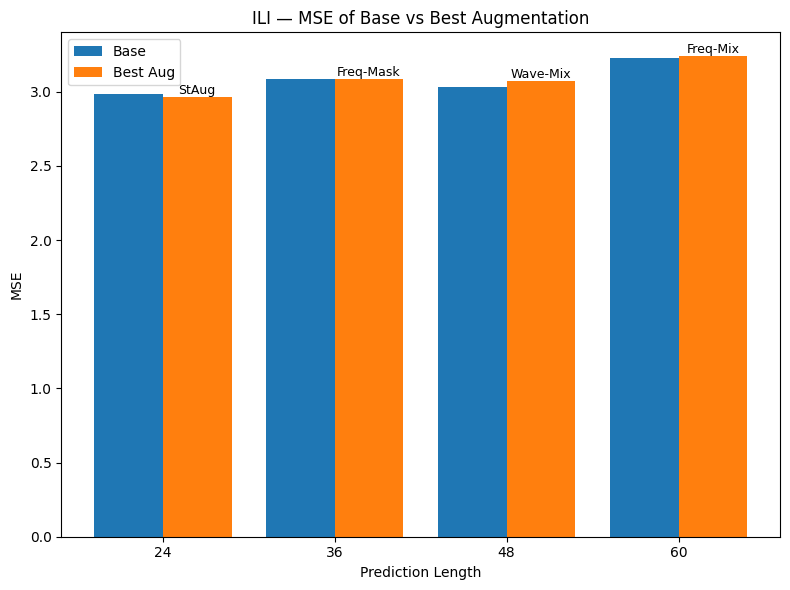

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = "/home/abidhasan/Documnet/Project/a_c_p/results/average_results_ILI.csv"

# Load data
df = pd.read_csv(csv_path)
# Clean strings
df["aug_type"] = df["aug_type"].astype(str).str.strip().str.strip("'")
df["dataset"] = df["dataset"].astype(str).str.strip()

# Select dataset
dataset_filter = "ILI"
df = df[df["dataset"] == dataset_filter]

results = []
for pred_len, group in df.groupby("pred_len"):
    # Get Base rows
    base_rows = group[group["aug_type"] == "Base"]
    if base_rows.empty:
        print(f"⚠️ No 'Base' aug_type found for pred_len={pred_len}")
        continue
    mse_base = base_rows["mse"].min()

    # Best augmentation (excluding Base)
    others = group[group["aug_type"] != "Base"]
    if others.empty:
        continue
    best_row = others.loc[others["mse"].idxmin()]

    results.append(
        {
            "pred_len": pred_len,
            "Base": mse_base,
            "Best_Aug": best_row["mse"],
            "Best_Aug_Type": best_row["aug_type"],
        }
    )

results_df = pd.DataFrame(results)
print("Results table:\n", results_df)

if not results_df.empty:
    results_df = results_df.sort_values("pred_len")
    x = range(len(results_df))
    bar_width = 0.4

    plt.figure(figsize=(8, 6))
    plt.bar(
        [i - bar_width / 2 for i in x],
        results_df["Base"],
        width=bar_width,
        label="Base",
    )
    plt.bar(
        [i + bar_width / 2 for i in x],
        results_df["Best_Aug"],
        width=bar_width,
        label="Best Aug",
    )

    plt.xticks(x, results_df["pred_len"].astype(str))
    plt.xlabel("Prediction Length")
    plt.ylabel("MSE")
    plt.title(f"{dataset_filter} — MSE of Base vs Best Augmentation")

    # Annotate best augmentation name
    for i, (aug, mse) in enumerate(
        zip(results_df["Best_Aug_Type"], results_df["Best_Aug"])
    ):
        plt.text(i + bar_width / 2, mse, aug, ha="center", va="bottom", fontsize=9)

    plt.legend()
    plt.tight_layout()
    plt.show()

Results table:
    pred_len      Base  Best_Aug Best_Aug_Type
0        96  0.176909  0.177018     Freq-Mask
1       192  0.220687  0.221042     Freq-Mask
2       336  0.268589  0.268525     Wave-Mask
3       720  0.334079  0.333072     Wave-Mask


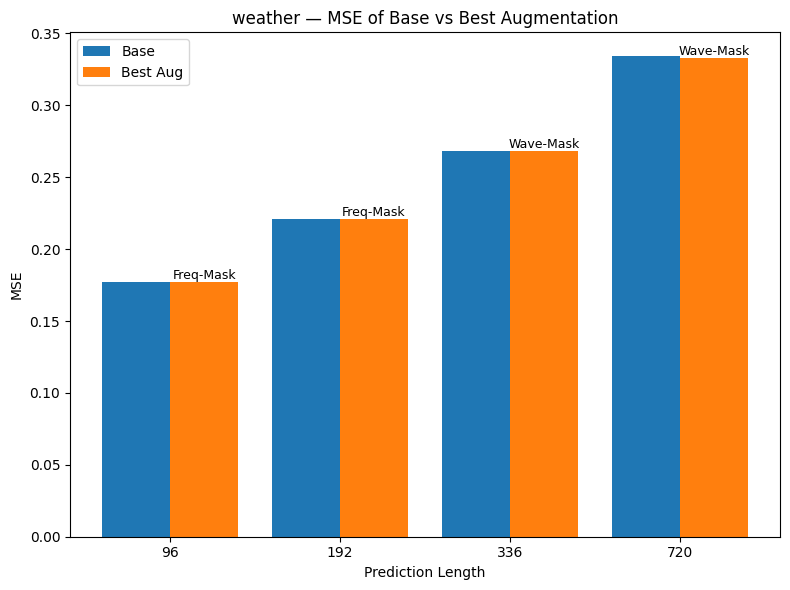

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV
csv_path = "/home/abidhasan/Documnet/Project/a_c_p/results/average_results_weather.csv"

# Load data
df = pd.read_csv(csv_path)
# Clean strings
df["aug_type"] = df["aug_type"].astype(str).str.strip().str.strip("'")
df["dataset"] = df["dataset"].astype(str).str.strip()

# Select dataset
dataset_filter = "weather"
df = df[df["dataset"] == dataset_filter]

results = []
for pred_len, group in df.groupby("pred_len"):
    # Get Base rows
    base_rows = group[group["aug_type"] == "Base"]
    if base_rows.empty:
        print(f"⚠️ No 'Base' aug_type found for pred_len={pred_len}")
        continue
    mse_base = base_rows["mse"].min()

    # Best augmentation (excluding Base)
    others = group[group["aug_type"] != "Base"]
    if others.empty:
        continue
    best_row = others.loc[others["mse"].idxmin()]

    results.append(
        {
            "pred_len": pred_len,
            "Base": mse_base,
            "Best_Aug": best_row["mse"],
            "Best_Aug_Type": best_row["aug_type"],
        }
    )

results_df = pd.DataFrame(results)
print("Results table:\n", results_df)

if not results_df.empty:
    results_df = results_df.sort_values("pred_len")
    x = range(len(results_df))
    bar_width = 0.4

    plt.figure(figsize=(8, 6))
    plt.bar(
        [i - bar_width / 2 for i in x],
        results_df["Base"],
        width=bar_width,
        label="Base",
    )
    plt.bar(
        [i + bar_width / 2 for i in x],
        results_df["Best_Aug"],
        width=bar_width,
        label="Best Aug",
    )

    plt.xticks(x, results_df["pred_len"].astype(str))
    plt.xlabel("Prediction Length")
    plt.ylabel("MSE")
    plt.title(f"{dataset_filter} — MSE of Base vs Best Augmentation")

    # Annotate best augmentation name
    for i, (aug, mse) in enumerate(
        zip(results_df["Best_Aug_Type"], results_df["Best_Aug"])
    ):
        plt.text(i + bar_width / 2, mse, aug, ha="center", va="bottom", fontsize=9)

    plt.legend()
    plt.tight_layout()
    plt.show()